# WetGrass analyzed using PyMC3. Inferring prob of some nodes conditioned on other nodes having given states.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm3
import scipy.stats as stats
import pprint as pp

np.random.seed(1234)
# plt.style.use('ggplot')

# plots don't show on notebook unless use this
%matplotlib inline

In [2]:
import os
import sys
cur_dir_path = os.getcwd()
print(cur_dir_path)
os.chdir('../../')
qfog_path = os.getcwd()
print(qfog_path)
sys.path.insert(0,qfog_path)

/home/jupyter/Notebooks/Quantum/quantum-fog/jupyter-notebooks/inference_via_ext_software
/home/jupyter/Notebooks/Quantum/quantum-fog


In [3]:
import importlib
mm = importlib.import_module("jupyter-notebooks.inference_via_ext_software.ModelMaker_PyMC3")
from graphs.BayesNet import *

In [4]:
# build BayesNet object bnet from bif file
in_path = "examples_cbnets/WetGrass.bif"
bnet = BayesNet.read_bif(in_path, False)

In [5]:
# build model (with all nodes observed) from bnet
prefix0 = "jupyter-notebooks/" +\
        "inference_via_ext_software/model_examples_c/"
file_prefix = prefix0 + "WetGrass_inf_obs_all"
obs_vertices = 'all'
mod_file = mm.ModelMaker_PyMC3.write_model_for_inf(file_prefix, bnet, obs_vertices)

.py file with model can be found here

<a href="model_examples_c/WetGrass_inf_obs_all_pymc3.py">
model_examples_c/WetGrass_inf_obs_all_pymc3.py</a>

In [6]:
# enter observed data here
data_Cloudy = np.array([0], dtype=int)

data_Rain = None

data_Sprinkler = None

data_WetGrass = np.array([1], dtype=int)

In [7]:
# -i option allows it to access notebook's namespace
%run -i $mod_file

In [8]:
# sample model
chain_length = 100 

with mod:      
    trace = pm3.sample(chain_length)
    print(trace)

Assigned BinaryGibbsMetropolis to Rain
Assigned BinaryGibbsMetropolis to Sprinkler
100%|██████████| 600/600 [00:00<00:00, 2324.31it/s]

<MultiTrace: 1 chains, 100 iterations, 2 variables>


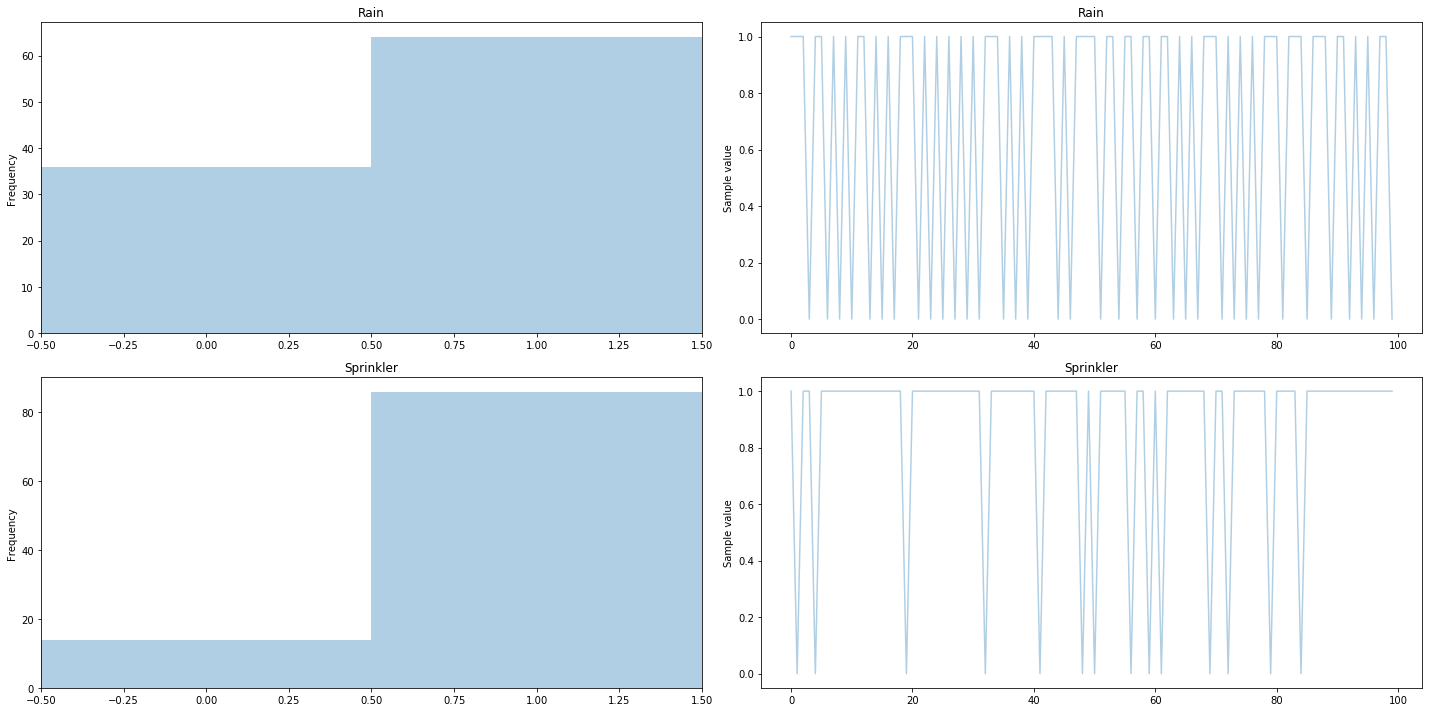

In [9]:
pm3.traceplot(trace,figsize=(20,10));

## Exact results using brute force (enumeration) and junction tree algorithms

In [10]:
from inference.JoinTreeEngine import *
from inference.EnumerationEngine import *
jtree_eng = JoinTreeEngine(bnet)
brute_eng = EnumerationEngine(bnet)

# introduce some evidence
bnet.get_node_named("Cloudy").active_states = [0]
bnet.get_node_named("WetGrass").active_states = [1]

#print node distributiona
node_list = jtree_eng.bnet_ord_nodes
jtree_pot_list = jtree_eng.get_unipot_list(node_list)
brute_pot_list = brute_eng.get_unipot_list(node_list)
for k in range(len(node_list)):
    print("brute:", brute_pot_list[k])
    print("jtree:", jtree_pot_list[k])
    print('')

brute: ['Cloudy']
[ 1.  0.]
jtree: ['Cloudy']
[ 1.  0.]

brute: ['Rain']
[ 0.34839842  0.65160158]
jtree: ['Rain']
[ 0.34839842  0.65160158]

brute: ['Sprinkler']
[ 0.13119789  0.86880211]
jtree: ['Sprinkler']
[ 0.13119789  0.86880211]

brute: ['WetGrass']
[ 0.  1.]
jtree: ['WetGrass']
[ 0.  1.]

